# SVN
* SVM aplicado na classificação de flores na base iris do sklearn

In [70]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import svm
import warnings
warnings.filterwarnings('ignore')

In [71]:
#importando os datasets disponiveis na biblioteca sklearn
from sklearn import datasets

In [72]:
#carregando o dataset iris
iris = datasets.load_iris()

In [73]:
#verificando as caracterisitas das colunas do dataset
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [74]:
#verificando o nome das classes
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [75]:
#dados de treino
treino = iris.data

In [76]:
#exibindo o tamanho dos dados de treino
treino.shape

(150, 4)

In [77]:
#dados da classe
classes = iris.target

In [78]:
classes.shape

(150,)

In [79]:
treino[:20]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3]])

In [80]:
set(classes)

{0, 1, 2}

In [81]:
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

<IPython.core.display.Javascript object>


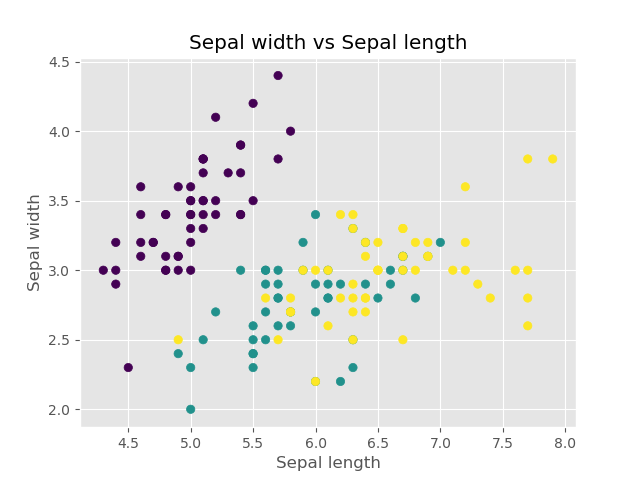

In [95]:
# Plota gráfico de disperssão dos dados com relação a classe.
# Disperssão dos dados de Sepal width e Sepal Length com as classes(0,1,2)
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
#sepal length vs sepal width
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Sepal width vs Sepal length')
plt.scatter(treino[:,0],treino[:,1], c=classes)

<IPython.core.display.Javascript object>


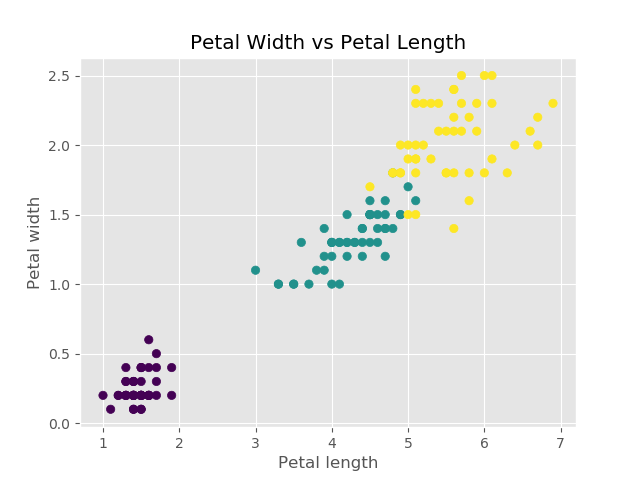

In [83]:
# Plota gráfico de disperssão dos dados com relação a classe.
# Disperssão dos dados de Petal width e Petal Length com as classes(0,1,2)
%matplotlib notebook
from matplotlib import style
style.use("ggplot")
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.title('Petal Width vs Petal Length')
plt.scatter(treino[:,2], treino[:,3], c=classes)

## Aplicando o SVN

In [84]:
#verificando o tamanho dos dados de treino
len(treino)

150

In [85]:
#verificando o tamanho dos dados das classes
len(classes)

150

In [86]:
#visualiando o tamanho dos dados de treino e as classes correspondentes que serão utilizados - 80%
len(treino[:-30]), len(classes[:-30])

(120, 120)

In [87]:
#realizando o treino com 80% dos dados
clf = svm.SVC().fit(treino[:-30],classes[:-30])

In [88]:
#definindo o dados de teste - 20%
teste = treino[-30:]

In [89]:
#predizendo os dados passados
clf.predict(teste)

array([2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2])

In [90]:
#classes reais
classes_teste = classes[-30:]

# Matriz de Confusão

In [91]:
print(pd.crosstab(classes_teste, clf.predict(teste), rownames=['valores preditos'], colnames=['valores reais'], margins=True))

valores reais     1   2  All
valores preditos            
2                 5  25   30
All               5  25   30


# Cross Validation

In [92]:
# Função que retorna a acurácia após fazer um validação cruzada (cross validation)
def Acuracia(clf,X,y):
    resultados = cross_val_predict(clf, X, y, cv=10)
    return metrics.accuracy_score(y,resultados)

In [93]:
print("acuracia:", Acuracia(clf,treino,classes))

acuracia: 0.98


In [94]:
# Imprime as métricas: 'precisão, revocação e Medida F1.
resultados = cross_val_predict(clf,treino, classes, cv=10)
valor_classes = [0,1,2]
print (metrics.classification_report(classes,resultados,valor_classes))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150

